In [1]:
import os
import sys
%matplotlib inline

import numpy as np
import pandas as pd
import ipywidgets
from scipy.optimize import Bounds
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data
from src import efficient_frontier
from src import plot
from src import portfolio
from src import capm
from src import backtesting
import numpy as np
import pandas as pd
import ipywidgets
from scipy.optimize import Bounds
import datetime
from dateutil import rrule
import yfinance as yf
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module='pandas')

In [2]:
x = pd.Timestamp(np.datetime64('2000-01-01'))
x1 = pd.Timestamp(np.datetime64('2022-01-01'))

In [3]:
weights = np.array([1/3,1/3,1/3])
min_esg_score = 1000
max_esg_score = 2000
df = pd.read_excel('../data/ESG_DATA_S&P500.xlsx')
dates = [x,x1]

start_year = dates[0]
end_year = dates[1]

Bounds1 = Bounds(0,1) #How willing we are to go short and to invest in one particular stock
Wanted_return = 0.20 #Only used when using the wanted_return constraint
maximum_risk = 0.10 #Either used when using maximum risk constraint or cmle portfolio
sharpe_type = "No_extra_constraint"  # rename to constraint, can be either Wanted_return or Maximum_risk or No_extra_constraint
risk_free_rate = 0.01
covariance_window = 5 #has to be in years
rebalancing_freq = 'monthly'

strategy = {'df': df,
 'weights': weights,
 'min_esg_score': min_esg_score,
 'max_esg_score': max_esg_score,
 'Bounds1': Bounds1,
 'sharpe_type': sharpe_type,
 'Wanted_return': Wanted_return,
 'maximum_risk': maximum_risk,
 'rebalancing_freq': rebalancing_freq,
 'risk_free_rate': risk_free_rate,
 'start_year' : start_year,
 'end_year' : end_year}


In [4]:
data5 = backtesting.backtesting(strategy, 'yearly', 1, '2015-01-01','2022-01-01',10,'SPY')

Min. Risk = 2.275% => Return: 0.814%  Sharpe Ratio = 0.36
Max. Sharpe Ratio = 0.49 => Return: 1.57%  Risk: 3.236%
0.783209878352324
Excpected return on investment is 77.54305746553939%
Min. Risk = 2.399% => Return: 0.754%  Sharpe Ratio = 0.31
Max. Sharpe Ratio = 0.51 => Return: 1.76%  Risk: 3.433%
0.8012206020080305
Excpected return on investment is 79.32545697913801%
Min. Risk = 2.561% => Return: 0.656%  Sharpe Ratio = 0.26
Max. Sharpe Ratio = 0.40 => Return: 1.60%  Risk: 3.968%
0.7735800271622975
Excpected return on investment is 76.58931860548357%
Min. Risk = 1.545% => Return: 0.958%  Sharpe Ratio = 0.62
Max. Sharpe Ratio = 0.82 => Return: 1.60%  Risk: 1.948%
0.8196932926357668
Excpected return on investment is 81.1560337091858%
Min. Risk = 2.193% => Return: 1.265%  Sharpe Ratio = 0.58
Max. Sharpe Ratio = 0.72 => Return: 1.92%  Risk: 2.664%
0.80885389669517
Excpected return on investment is 80.08641417877054%
Min. Risk = 2.276% => Return: 1.208%  Sharpe Ratio = 0.53
Max. Sharpe Rati

In [5]:
print(data5[4])

[[0.027629512459150823], [0.03223026014154024], [0.025245985065094186], [0.040659355346059176], [0.044441763111257214], [0.03913814481060437], [0.04761541260246729], [0.0421156000475103]]


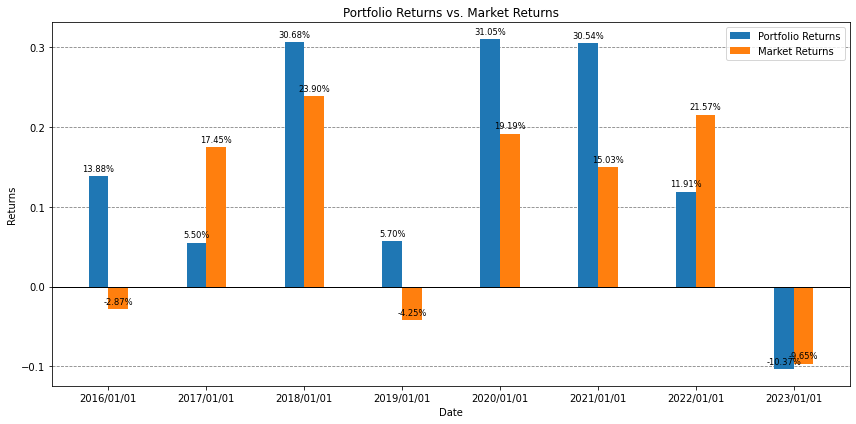

In [6]:



plot.compare_returns1(data5[8],np.concatenate(data5[5]),data5[6])

